In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# File path
file_path = 'lysin_combined_df.json'

# Load the JSON data
lysin_combined_df = pd.read_json(file_path, lines=True)

# Display the first few rows of the DF
lysin_combined_df.head(5)

,GeneID,Length,Name,translation,Notes,HostStrain,Cluster,LysinType,Distance from Consensus,Hamming Distance,MolecularWeight,Aromaticity,InstabilityIndex,Gravy,IsoelectricPoint,AliphaticIndex,Hydrophobicity,Cluster_encoded,HostStrain_encoded
0,20ES_CDS_10,978,20ES,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,b'lysin B',Mycobacterium,A2,lysin B,0.961661,277,36578.3514,0.107692,28.285877,-0.326462,5.823575,82.584615,-0.326462,11,6
1,20ES_CDS_8,1299,20ES,MTAVITRKQAQWVHDMARARNGLPYAYGGAFTNDPKRSTDCSGLVL...,b'lysin A',Mycobacterium,A2,lysin A,0.990251,406,47493.7668,0.085648,43.986574,-0.496991,6.033084,70.763889,-0.496991,11,6
2,244_CDS_34,1503,244,MSVTRANVEATKRFIGERVGNPYVYGGALSPTNVHQGTDCSEVWQT...,b'lysin A',Mycobacterium,E,lysin A,0.986502,464,54853.4855,0.088000,31.915200,-0.496000,5.275534,72.000000,-0.496000,193,6
3,32HC_CDS_36,1368,32HC,MPGSEIPRYWPLGAGRIVTSPFGPRSGGFHAGVDFGRNGGSAGMPV...,b'lysin A',Mycobacterium,Z,lysin A,0.988001,423,49043.3853,0.087912,41.476484,-0.469451,8.209549,67.142857,-0.469451,299,6
4,32HC_CDS_37,1152,32HC,MAWKQPQLTDPPMVSEEIGKLNRRLLLAYAANSRAVEAGVQLHDVF...,b'lysin B',Mycobacterium,Z,lysin B,0.975240,352,41216.7621,0.091384,41.574413,0.020366,6.173590,89.947781,0.020366,299,6


In [3]:
# Check data types and non-null counts
lysin_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7133 entries, 0 to 7132
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GeneID                   7133 non-null   object 
 1   Length                   7133 non-null   int64  
 2   Name                     7133 non-null   object 
 3   translation              7133 non-null   object 
 4   Notes                    7133 non-null   object 
 5   HostStrain               7133 non-null   object 
 6   Cluster                  7133 non-null   object 
 7   LysinType                7133 non-null   object 
 8   Distance from Consensus  7133 non-null   float64
 9   Hamming Distance         7133 non-null   int64  
 10  MolecularWeight          7133 non-null   float64
 11  Aromaticity              7133 non-null   float64
 12  InstabilityIndex         7133 non-null   float64
 13  Gravy                    7133 non-null   float64
 14  IsoelectricPoint        

In [4]:
# Get descriptive statistics for encoded categorical columns to decide if want to normalize
lysin_combined_df[['Cluster_encoded', 'HostStrain_encoded']].describe()

,Cluster_encoded,HostStrain_encoded
count,7133.000000,7133.000000
mean,132.993831,5.287677
std,91.954983,1.889090
min,0.000000,0.000000
25%,60.000000,4.000000
50%,129.000000,6.000000
75%,210.000000,6.000000
max,299.000000,10.000000


In [5]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [6]:
# Columns to normalize
columns_to_normalize = [
    'Length', 'Distance from Consensus', 'Hamming Distance', 'MolecularWeight',
    'Aromaticity', 'InstabilityIndex', 'Gravy', 'IsoelectricPoint',
    'AliphaticIndex', 'Hydrophobicity', 'Cluster_encoded', 'HostStrain_encoded'
]

# Apply normalization
lysin_combined_df[columns_to_normalize] = scaler.fit_transform(lysin_combined_df[columns_to_normalize])

# Check the scaled features
lysin_combined_df[columns_to_normalize].head(5)

,Length,Distance from Consensus,Hamming Distance,MolecularWeight,Aromaticity,InstabilityIndex,Gravy,IsoelectricPoint,AliphaticIndex,Hydrophobicity,Cluster_encoded,HostStrain_encoded
0,0.224124,0.524752,0.211896,0.243737,0.650799,0.267401,0.505005,0.223089,0.670062,0.505005,0.036789,0.6
1,0.311328,0.879154,0.331784,0.329202,0.444063,0.516041,0.398685,0.249443,0.541119,0.398685,0.036789,0.6
2,0.366748,0.832674,0.385688,0.386827,0.466119,0.324875,0.399302,0.154153,0.554603,0.399302,0.645485,0.6
3,0.330073,0.851266,0.347584,0.341335,0.465295,0.476290,0.415855,0.523214,0.501620,0.415855,1.000000,0.6
4,0.271394,0.693069,0.281599,0.280054,0.497853,0.477841,0.721242,0.267117,0.750381,0.721242,1.000000,0.6


In [7]:
# List of features 
features = [
    'Length', 'Distance from Consensus', 'Hamming Distance', 'MolecularWeight',
    'Aromaticity', 'InstabilityIndex', 'Gravy', 'IsoelectricPoint',
    'AliphaticIndex', 'Hydrophobicity', 'Cluster_encoded', 'HostStrain_encoded'
]

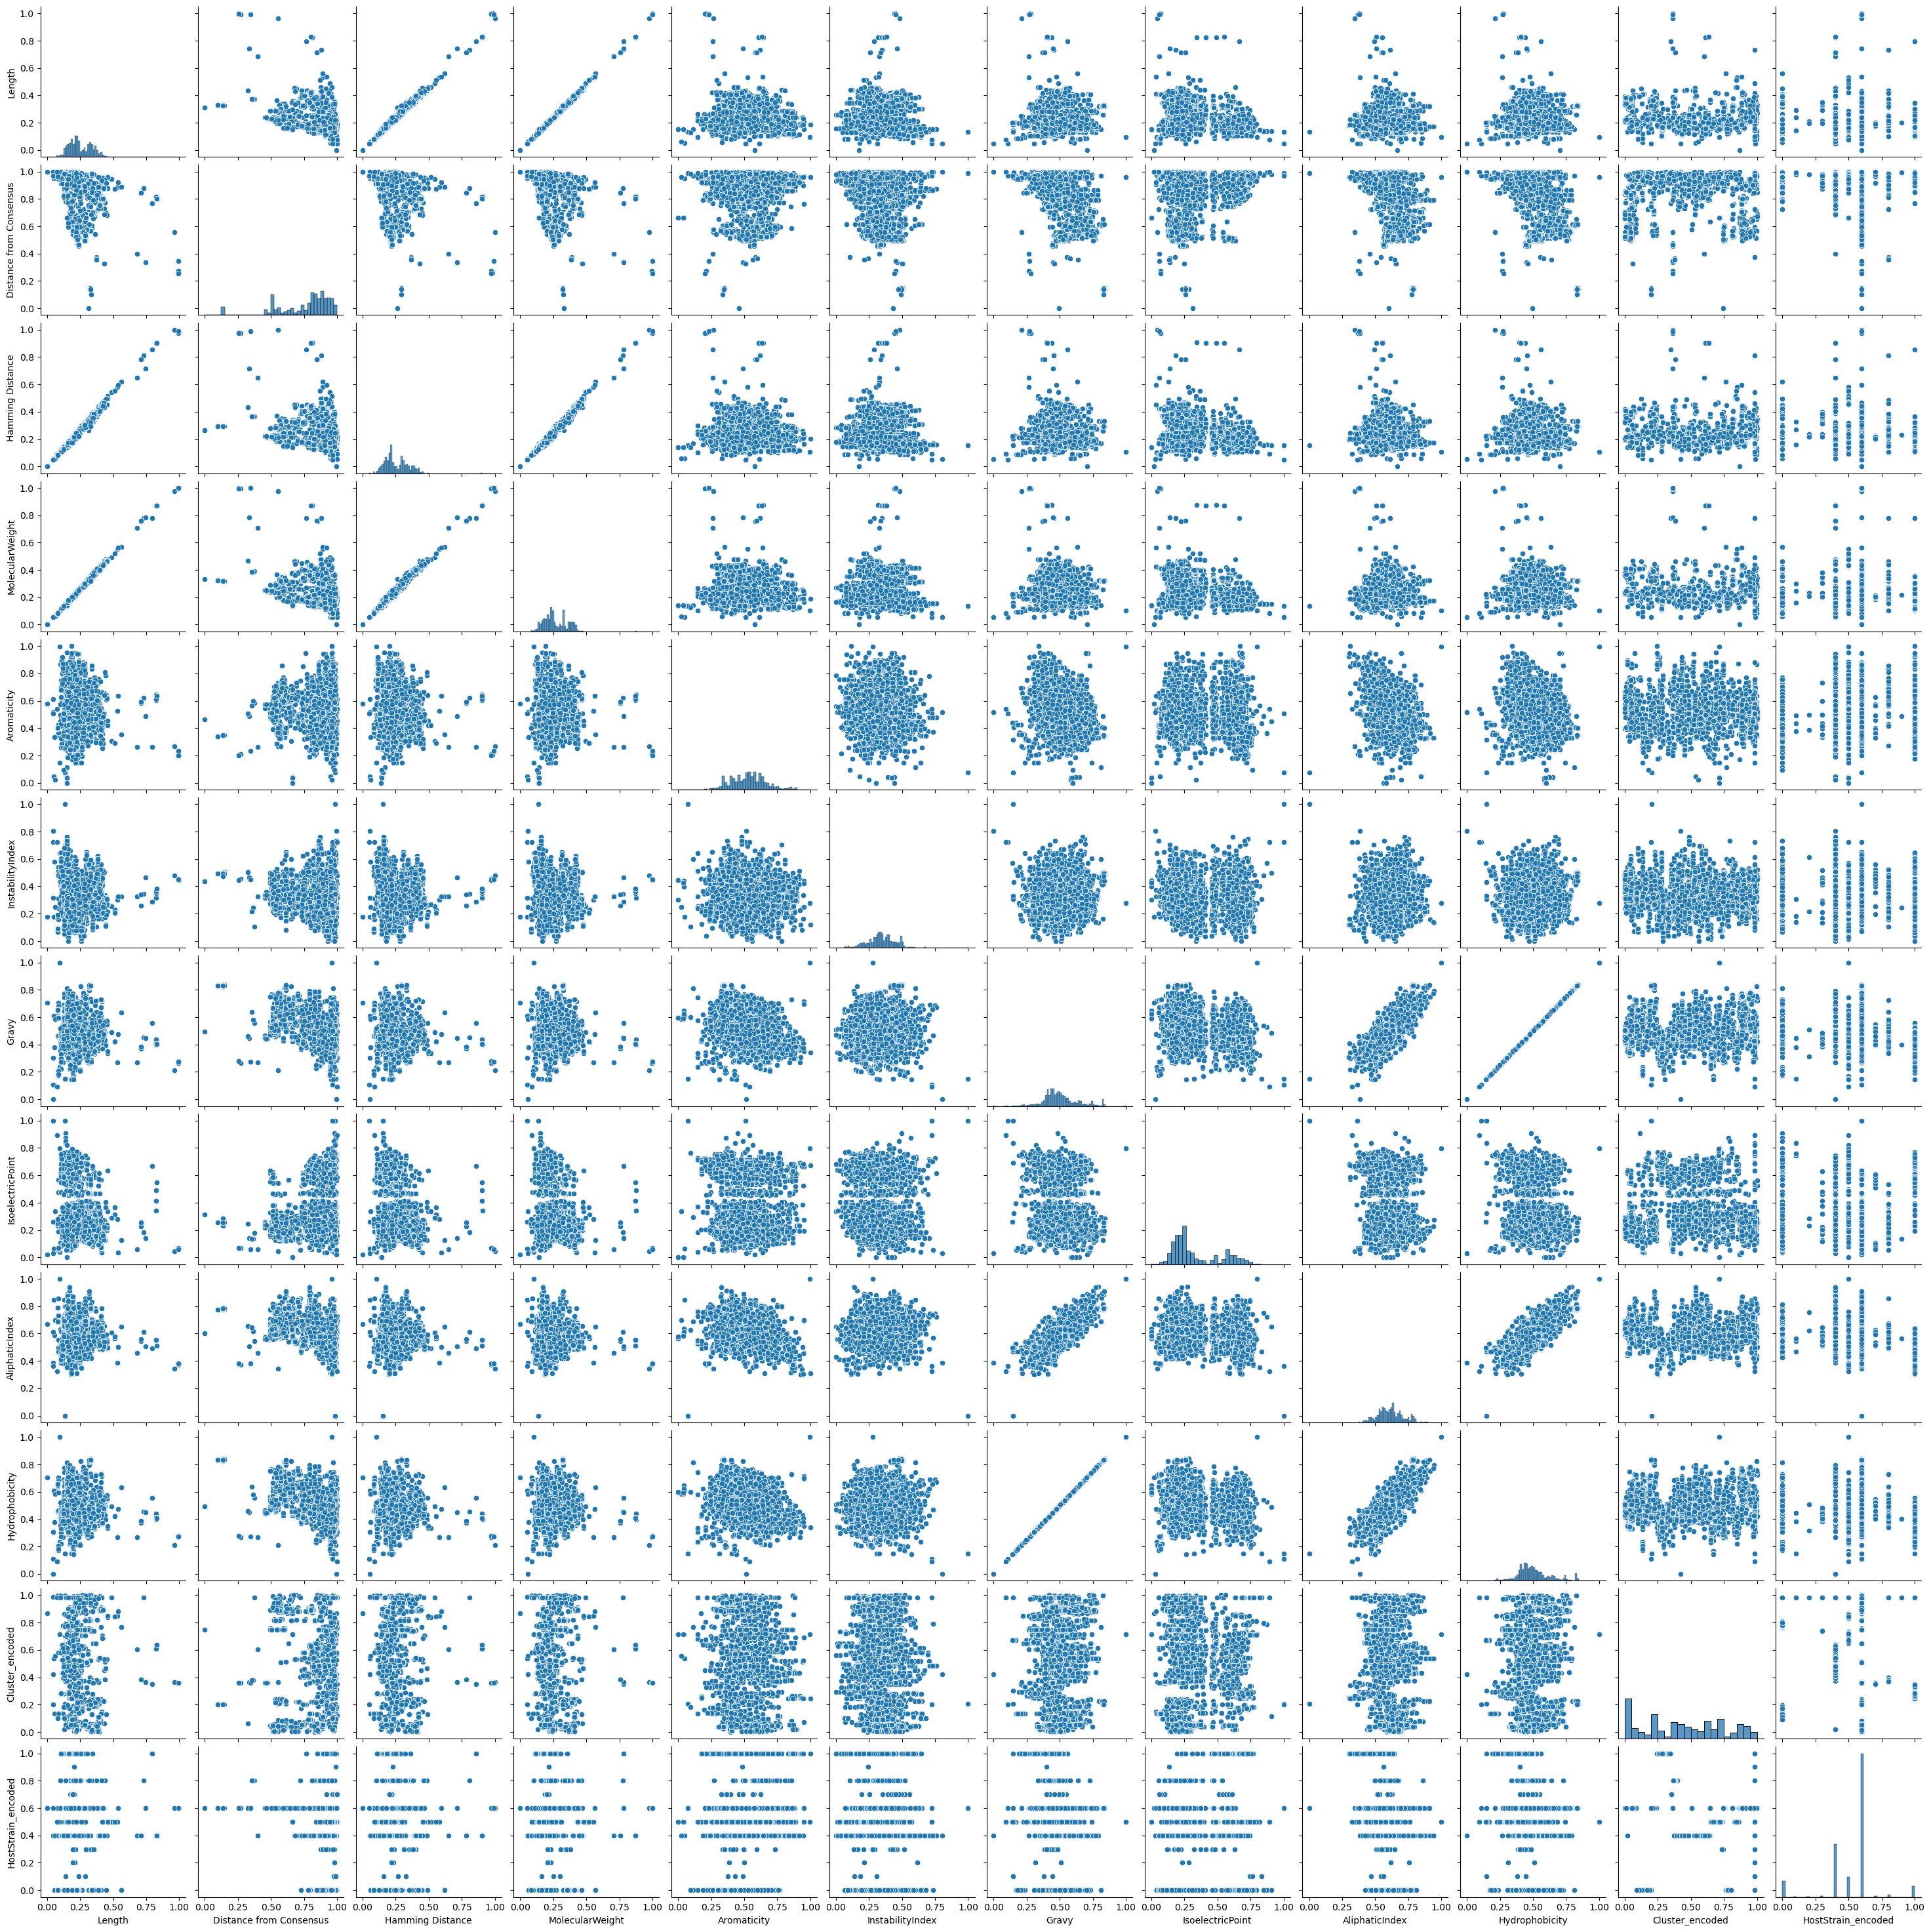

In [8]:
# Create a pair plot
sns.pairplot(lysin_combined_df[features])
plt.show()

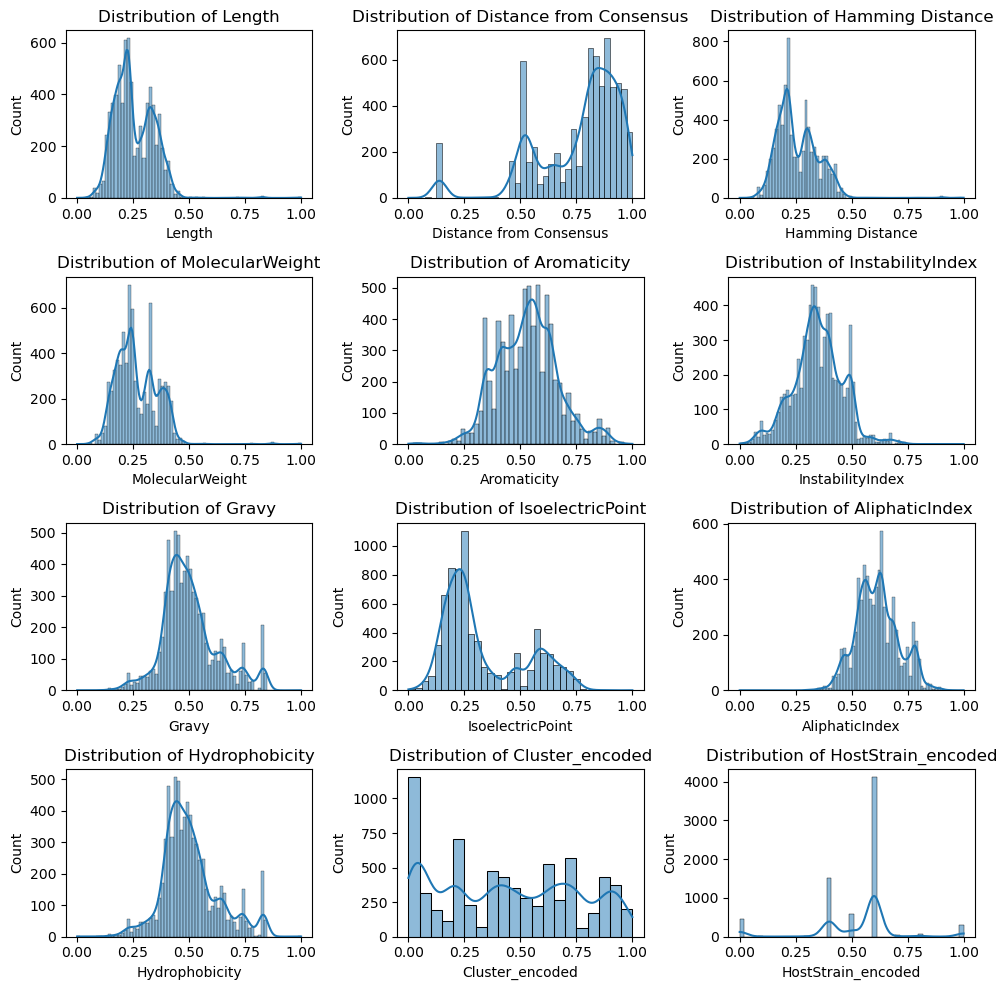

In [9]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()

# Plot each feature
for ax, feature in zip(axes, features):
    sns.histplot(lysin_combined_df[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# Define scoring functions for each feature 
def score_length(x):
    # Assuming shorter lengths are better up to a threshold
    threshold = 1000  # example threshold for best length
    return np.exp(-x / threshold)

def score_distance_from_consensus(x):
    # Best when the distance is lower
    return 1 / (1 + x)  # simple inverse function

def score_hamming_distance(x):
    # Similar to distance from consensus
    return 1 / (1 + x)

def score_molecular_weight(x):
    # Assuming best weight is around 40000 Daltons
    return np.exp(-abs(x - 40000) / 10000)

def score_aromaticity(x):
    # Lower is better
    return 1 - x

def score_instability_index(x):
    # Lower is more stable
    return 1 - (x / 100)  # Normalize assuming instability ranges up to 100

def score_gravy(x):
    # Assuming an optimal GRAVY around 0 for balance
    return np.exp(-abs(x))

def score_isoelectric_point(x):
    # Close to skin pH is better
    skin_pH = 5.5
    return np.exp(-abs(x - skin_pH) / 2)

def score_aliphatic_index(x):
    # Higher is better
    return x / 100  # Normalize based on expected range

def score_hydrophobicity(x):
    # Balance around 0
    return np.exp(-abs(x))

In [11]:
# Apply scoring functions to the DataFrame
lysin_combined_df['Length_Score'] = lysin_combined_df['Length'].apply(score_length)
lysin_combined_df['Consensus_Score'] = lysin_combined_df['Distance from Consensus'].apply(score_distance_from_consensus)
lysin_combined_df['Hamming_Score'] = lysin_combined_df['Hamming Distance'].apply(score_hamming_distance)
lysin_combined_df['MW_Score'] = lysin_combined_df['MolecularWeight'].apply(score_molecular_weight)
lysin_combined_df['Aromaticity_Score'] = lysin_combined_df['Aromaticity'].apply(score_aromaticity)
lysin_combined_df['Instability_Score'] = lysin_combined_df['InstabilityIndex'].apply(score_instability_index)
lysin_combined_df['Gravy_Score'] = lysin_combined_df['Gravy'].apply(score_gravy)
lysin_combined_df['Isoelectric_Score'] = lysin_combined_df['IsoelectricPoint'].apply(score_isoelectric_point)
lysin_combined_df['Aliphatic_Score'] = lysin_combined_df['AliphaticIndex'].apply(score_aliphatic_index)
lysin_combined_df['Hydrophobicity_Score'] = lysin_combined_df['Hydrophobicity'].apply(score_hydrophobicity)

# Sum all scores to get a effectiveness score
score_columns = [col for col in lysin_combined_df.columns if 'Score' in col]
lysin_combined_df['Effectiveness_Score'] = lysin_combined_df[score_columns].mean(axis=1)

In [12]:
# Sort the DataFrame by 'Effectiveness_Score' in descending order to get the best scores at the top
top_lysin_entries = lysin_combined_df.sort_values(by='Effectiveness_Score', ascending=False).head(5)

# Print the GeneIDs of the top 10 entries along with their scores for review
print("Top 10 GeneIDs with their effectiveness scores:")
top_lysin_entries[['GeneID', 'Effectiveness_Score']]


Top 10 GeneIDs with their effectiveness scores:


,GeneID,Effectiveness_Score
2878,Imvubu_CDS_39,0.613220
2484,Gorko_CDS_32,0.601254
1795,DrYang_CDS_71,0.592938
4955,Phergie_CDS_47,0.587005
3576,LibertyBell_CDS_4,0.586711


In [13]:
# Display the first few rows of the DataFrame
lysin_combined_df.head()

,GeneID,Length,Name,translation,Notes,HostStrain,Cluster,LysinType,Distance from Consensus,Hamming Distance,...,Consensus_Score,Hamming_Score,MW_Score,Aromaticity_Score,Instability_Score,Gravy_Score,Isoelectric_Score,Aliphatic_Score,Hydrophobicity_Score,Effectiveness_Score
0,20ES_CDS_10,0.224124,20ES,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,b'lysin B',Mycobacterium,A2,lysin B,0.524752,0.211896,...,0.655844,0.825153,0.018316,0.349201,0.997326,0.603502,0.071472,0.006701,0.603502,0.513079
1,20ES_CDS_8,0.311328,20ES,MTAVITRKQAQWVHDMARARNGLPYAYGGAFTNDPKRSTDCSGLVL...,b'lysin A',Mycobacterium,A2,lysin A,0.879154,0.331784,...,0.532154,0.750872,0.018316,0.555937,0.994840,0.671202,0.072420,0.005411,0.671202,0.527204
2,244_CDS_34,0.366748,244,MSVTRANVEATKRFIGERVGNPYVYGGALSPTNVHQGTDCSEVWQT...,b'lysin A',Mycobacterium,E,lysin A,0.832674,0.385688,...,0.545651,0.721663,0.018316,0.533881,0.996751,0.670788,0.069050,0.005546,0.670788,0.523207
3,32HC_CDS_36,0.330073,32HC,MPGSEIPRYWPLGAGRIVTSPFGPRSGGFHAGVDFGRNGGSAGMPV...,b'lysin A',Mycobacterium,Z,lysin A,0.851266,0.347584,...,0.540171,0.742069,0.018316,0.534705,0.995237,0.659776,0.083043,0.005016,0.659776,0.523778
4,32HC_CDS_37,0.271394,32HC,MAWKQPQLTDPPMVSEEIGKLNRRLLLAYAANSRAVEAGVQLHDVF...,b'lysin B',Mycobacterium,Z,lysin B,0.693069,0.281599,...,0.590643,0.780276,0.018316,0.502147,0.995222,0.486148,0.073062,0.007504,0.486148,0.493919


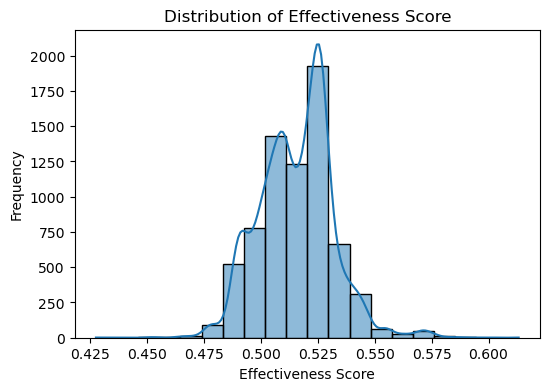

In [14]:
# Plot a histogram of the Effectiveness_Score
plt.figure(figsize=(6, 4))
sns.histplot(lysin_combined_df['Effectiveness_Score'], bins=20, kde=True)
plt.title('Distribution of Effectiveness Score')
plt.xlabel('Effectiveness Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Show information about the DataFrame again to verify changes
lysin_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7133 entries, 0 to 7132
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GeneID                   7133 non-null   object 
 1   Length                   7133 non-null   float64
 2   Name                     7133 non-null   object 
 3   translation              7133 non-null   object 
 4   Notes                    7133 non-null   object 
 5   HostStrain               7133 non-null   object 
 6   Cluster                  7133 non-null   object 
 7   LysinType                7133 non-null   object 
 8   Distance from Consensus  7133 non-null   float64
 9   Hamming Distance         7133 non-null   float64
 10  MolecularWeight          7133 non-null   float64
 11  Aromaticity              7133 non-null   float64
 12  InstabilityIndex         7133 non-null   float64
 13  Gravy                    7133 non-null   float64
 14  IsoelectricPoint        

In [16]:
# Define the features and target variable
features = [
    'Length_Score', 'Consensus_Score', 'Hamming_Score', 'MW_Score', 
    'Aromaticity_Score', 'Instability_Score', 'Gravy_Score', 'Isoelectric_Score', 
    'Aliphatic_Score', 'Hydrophobicity_Score', 'Cluster_encoded', 'HostStrain_encoded'
]

target = 'Effectiveness_Score'

X = lysin_combined_df[features]
y = lysin_combined_df[target]

In [17]:
# Standardize the magnitude of numeric features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

In [18]:
# Split the data for modeling
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [19]:
# Save the preprocessed data to a JSON file
preprocessed_file_path = 'lysin_combined_preprocessed.json'
lysin_combined_df.to_json(preprocessed_file_path, orient='records', lines=True)

In [20]:
# Check the shape of the data before modeling
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5706, 12)
X_test shape: (1427, 12)
y_train shape: (5706,)
y_test shape: (1427,)
